<a href="https://colab.research.google.com/github/NayeGarciaP/Mi-primer-repositorio-/blob/main/Redes_de_multicapa/RED_NEURONAL_(Clasificaci%C3%B3n_de_candidatos).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# Generar dataset sintético con diferentes rangos por habilidad
n_muestras = 5000
# Habilidades técnicas: 70-100 #Segmentar por habilidades matematicas tecnológicas
tec = np.random.randint(70, 101, (n_muestras, 6)) # Toma del numpy numero aleatorio entero entre 70 y 100, filas y columnas
# Habilidades matemáticas: 60-90
mat = np.random.randint(60, 91, (n_muestras, 6)) #Mide la cantidad de muestras  6
# Habilidades psicológicas: 50-85
psi = np.random.randint(50, 86, (n_muestras, 6)) # 6 habilidades tecnicas, matematicas y psicologicas
# Nombres de columnas
columnas = [ #Queremos clasificar las columanas por nombre para ver cual de ellas sabe
    'python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube',
    'estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado',
    'trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas'
]
# Crear DataFrame #Generar un dataframe
df = pd.DataFrame(np.concatenate([tec, mat, psi], axis=1), columns=columnas)



In [2]:
df

,python,sql,visualizacion_datos,excel,manejo_apis,nube,estadistica,probabilidad,algebra_lineal,calculo,optimizacion,modelado,trabajo_equipo,comunicacion,creatividad,adaptabilidad,liderazgo,resolucion_problemas
0,80,78,75,85,79,82,83,82,82,70,69,87,63,71,80,53,72,56
1,96,85,91,93,78,71,73,74,86,79,88,77,76,76,55,78,59,63
2,97,100,70,72,89,77,72,67,77,74,69,60,51,63,64,58,59,81
3,88,92,76,91,95,85,79,62,60,65,70,78,51,81,68,75,68,64
4,86,75,71,91,76,95,68,90,81,62,68,89,83,71,74,85,63,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,89,87,88,77,91,82,82,89,85,72,70,73,62,83,69,73,60,83
4996,72,90,77,79,80,88,73,68,72,77,74,82,61,78,63,74,62,62
4997,79,70,76,92,97,95,62,68,76,82,75,78,83,61,53,63,70,65
4998,77,72,89,95,78,98,71,74,61,82,62,73,56,64,76,72,54,60


Obtenemos la etiqueta y

In [3]:
# Calcular promedio por grupo y promedio total
prom_tecnologicas = df[['python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube']].mean(axis=1)
prom_matematicas  = df[['estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado']].mean(axis=1)
prom_psicologicas = df[['trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas']].mean(axis=1)
# Promedio total = promedio de los 3 promedios
prom_total = (prom_tecnologicas + prom_matematicas + prom_psicologicas) / 3 #se obtiene el total
# Etiqueta: 1 = apto si promedio total > 80
y = (prom_total > 75).astype(int) #Asigna valores
# one-hot encoding
y = pd.get_dummies(y).values

In [4]:
y

array([[ True, False],
       [False,  True],
       [ True, False],
       ...,
       [ True, False],
       [ True, False],
       [False,  True]])

Obtenemos los conjuntos de entrenamiento y de test




In [5]:
from sklearn.model_selection import train_test_split #Separa por bloque
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42 #20% de porcentaje
)

# Escalamiento
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Red **neuronal**

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
modelo = Sequential([ #18
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'), #64
    Dense(32, activation='relu'), # 32 capas ocultas, el relu se puede cambiar por el sigmoid
    Dense(16, activation='relu'), #capas oculta con 16 neuronas
    Dense(2, activation='softmax') # Coincide con la cantidad de clases que voy a tener #capa de salida 2 neuronas
])
#18 columnas del dataframe (6*3) 18 parametros
adam = Adam(learning_rate=0.001)
modelo.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenamiento

In [7]:
#optimizador come el aprendizaje
#para la metrica se usa la presicion para evaluar la métrica
history = modelo.fit(  #Entrena 50 épocas
    X_train, y_train,
    epochs=50,
    batch_size=1, # se puede cambiar por 8 y si colocas cero no da nada
    validation_data=(X_test, y_test),
    verbose=1
) #el accuracy y loss son parte del entrenamiento

Epoch 1/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8617 - loss: 0.2781 - val_accuracy: 0.9640 - val_loss: 0.0874
Epoch 2/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9672 - loss: 0.0711 - val_accuracy: 0.9730 - val_loss: 0.0719
Epoch 3/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9773 - loss: 0.0559 - val_accuracy: 0.9690 - val_loss: 0.0631
Epoch 4/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9794 - loss: 0.0479 - val_accuracy: 0.9680 - val_loss: 0.0781
Epoch 5/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9868 - loss: 0.0341 - val_accuracy: 0.9800 - val_loss: 0.0550
Epoch 6/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9884 - loss: 0.0287 - val_accuracy: 0.9640 - val_loss: 0.0908
Epoch 7/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9878 - loss: 0.0281 - val_accuracy: 0.9580 - val_loss: 0.1301
Epoch 8/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9854 - loss: 0

Evaluación

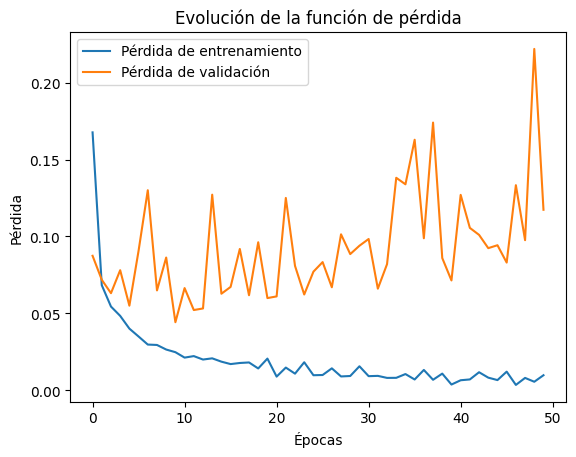

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9740 - loss: 0.1389

🔹 Loss: 0.1174  |  Accuracy: 0.9780


In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la función de pérdida')
plt.show()

loss, acc = modelo.evaluate(X_test, y_test)
print(f"\n🔹 Loss: {loss:.4f}  |  Accuracy: {acc:.4f}")

Matriz de confusión

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


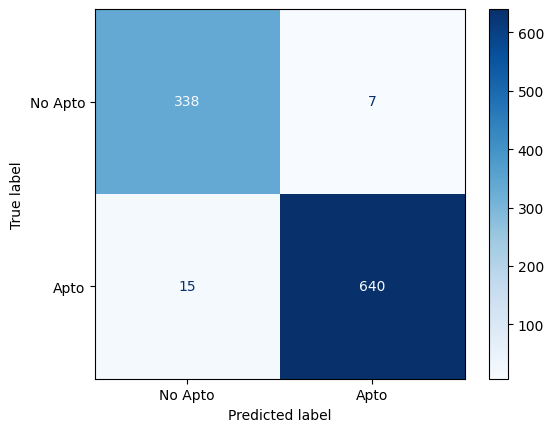


Sensitivity (Recall) por clase:
No Apto: 0.98
Apto: 0.98


In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

pred = modelo.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Apto', 'Apto'])
disp.plot(cmap='Blues')
plt.show()

sensitivity = recall_score(y_true, y_pred, average=None)
print("\nSensitivity (Recall) por clase:")
print(f"No Apto: {sensitivity[0]:.2f}")
print(f"Apto: {sensitivity[1]:.2f}")